In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['target'])
data = pd.concat([X,y], axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data['target'] = data['target'].apply(lambda x: round(x/10))
y = data['target']
X = data.drop(columns=['target'])
y.value_counts()

2    288
1     92
3     76
4     26
5     22
0      2
Name: target, dtype: int64

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0 )

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_test,y_test)
model.score(X_test, y_test)

0.5957429854371359

In [8]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score( LogisticRegression(), X_test, y_test, cv = 10, scoring = 'accuracy' )
print(cross)
print(np.mean(cross))

[0.61538462 0.76923077 0.66666667 0.81818182 0.90909091 0.8
 0.75       0.625      0.75       0.75      ]
0.7453554778554778


In [9]:
k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5900815850815851, 0.6526573426573427, 0.6617482517482517, 0.7172086247086247, 0.7339918414918415, 0.7227738927738928, 0.7262995337995338, 0.7227738927738928, 0.7262995337995338, 0.7025815850815851, 0.6907226107226108, 0.6885314685314686, 0.6976223776223776, 0.6774300699300699, 0.6683391608391608, 0.6766724941724942, 0.6759149184149184, 0.6467482517482518, 0.6413636363636364]


Text(0,0.5,'Cross-Validated Accuracy')

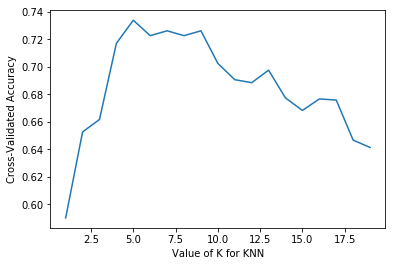

In [10]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

## LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 0.25, 0.5, 0.55, 0.6, 0.8, 0.9]}

In [35]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
grid_lr = GridSearchCV(lr, lr_params, scoring='accuracy', cv=10)
grid_lr.fit(X_test, y_test)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 0.25, 0.5, 0.55, 0.6, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [36]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)

{'C': 0.5, 'penalty': 'l1'}
0.7647058823529411
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


## SVC

In [37]:
from sklearn.svm import SVC
svc_params = {
    'C': [0.05, 0.1, 0.15, 0.2, 0.25, 0.28, 0.29],
    'kernel': ['linear', 'poly']} #', 'rbf', 'sigmoid']}

In [38]:
svc = SVC()
grid_svc = GridSearchCV(svc, svc_params, scoring='accuracy', cv=5)
grid_svc.fit(X_test, y_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.05, 0.1, 0.15, 0.2, 0.25, 0.28, 0.29], 'kernel': ['linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)
print(grid_svc.best_estimator_)

{'C': 0.25, 'kernel': 'linear'}
0.7450980392156863
SVC(C=0.25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_params = {
    'n_neighbors': [3, 4, 5],
    'p': [1, 2]}

In [42]:
knn = KNeighborsClassifier(metric='minkowski')
grid_knn = GridSearchCV(knn, knn_params, scoring='accuracy', cv=10)
grid_knn.fit(X_test, y_test)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 4, 5], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)
print(grid_knn.best_estimator_)

{'n_neighbors': 5, 'p': 1}
0.7352941176470589
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform')


## DecisionTree

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [10, 11, 12]}

In [45]:
tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree, tree_params, scoring='accuracy', cv=10)
grid_tree.fit(X_test, y_test)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5], 'min_samples_leaf': [10, 11, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)
print(grid_tree.best_estimator_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.7549019607843137
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


## RandomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest_params = {
    'n_estimators': [38, 40, 43, 45],
    'criterion': ['gini', 'entropy'],
    'max_depth': [7, 8, 9, 10, 14, 15, 16],
    'min_samples_leaf': [1, 2, 3]}

In [58]:
forest = RandomForestClassifier()
grid_forest = GridSearchCV(forest, forest_params, scoring='accuracy', cv=10, n_jobs=-1)
grid_forest.fit(X_test, y_test)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [38, 40, 43, 45], 'criterion': ['gini', 'entropy'], 'max_depth': [7, 8, 9, 10, 14, 15, 16], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [59]:
print(grid_forest.best_params_)
print(grid_forest.best_score_)
print(grid_forest.best_estimator_)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 45}
0.803921568627451
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


## Вывести итоговое качество

In [60]:
estimators = {
    'regression': grid_lr,
    'svm': grid_svc,
    'knn': grid_knn,
    'tree': grid_tree,
    'forest': grid_forest}

In [61]:
for k in estimators:
    v = estimators[k]
    print(k, "CV Accuracy:", v.best_score_, "Validation Accuracy:", v.best_estimator_.score(X_valid, y_valid))

regression CV Accuracy: 0.7647058823529411 Validation Accuracy: 0.4411764705882353
svm CV Accuracy: 0.7450980392156863 Validation Accuracy: 0.22549019607843138
knn CV Accuracy: 0.7352941176470589 Validation Accuracy: 0.5980392156862745
tree CV Accuracy: 0.7549019607843137 Validation Accuracy: 0.21568627450980393
forest CV Accuracy: 0.803921568627451 Validation Accuracy: 0.5588235294117647
